# Introduction

---

This notebook focuses on analyzing Sustainable Development Goal (SDG) Indicator 4.4.1, which measures the proportion of youth and adults with Information and Communication Technology (ICT) skills, categorized by specific types of skills. The goal of this analysis is to provide insights into the current status and progress of ICT skill development across different populations, supporting efforts to increase digital literacy globally. By understanding these trends, policymakers can identify areas for improvement and implement targeted initiatives to ensure inclusive and equitable access to digital technologies by 2030.


Author: <br>
Novelya Putri Ramadhani<br>


### 1. Load Dataset
We could load the dataset from XLSX

In [1]:
import pandas as pd

In [2]:
data_441 = pd.read_excel("../datasets/4.4.xlsx")

### 2. Data Overview
Sneak peek of the data

In [3]:
data_441.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,Source,GeoInfoUrl,FootNote,Age,Location,Nature,Reporting Type,Sex,Type of skill,Units
0,4,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,8,Albania,2019,94.4,2019,...,INSTAT (Institute of Statistics),NaN,NaN,15-24,ALLAREA,C,G,MALE,SNTWK,PERCENT
1,4,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,8,Albania,2019,70.1,2019,...,INSTAT (Institute of Statistics),NaN,NaN,25-74,ALLAREA,C,G,BOTHSEX,SNTWK,PERCENT
2,4,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,8,Albania,2019,66.8,2019,...,INSTAT (Institute of Statistics),NaN,NaN,25-74,ALLAREA,C,G,FEMALE,SNTWK,PERCENT
3,4,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,8,Albania,2019,73.2,2019,...,INSTAT (Institute of Statistics),NaN,NaN,25-74,ALLAREA,C,G,MALE,SNTWK,PERCENT
4,4,4.4,4.4.1,SE_ADT_ACTS,Proportion of youth and adults with informatio...,8,Albania,2019,73.4,2019,...,INSTAT (Institute of Statistics),NaN,NaN,ALLAGE,ALLAREA,C,G,FEMALE,SNTWK,PERCENT


In [4]:
data_441.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117301 entries, 0 to 117300
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Goal               117301 non-null  int64  
 1   Target             117301 non-null  float64
 2   Indicator          117301 non-null  object 
 3   SeriesCode         117301 non-null  object 
 4   SeriesDescription  117301 non-null  object 
 5   GeoAreaCode        117301 non-null  int64  
 6   GeoAreaName        117301 non-null  object 
 7   TimePeriod         117301 non-null  int64  
 8   Value              117301 non-null  float64
 9   Time_Detail        117301 non-null  int64  
 10  TimeCoverage       0 non-null       float64
 11  UpperBound         0 non-null       float64
 12  LowerBound         0 non-null       float64
 13  BasePeriod         0 non-null       float64
 14  Source             117301 non-null  object 
 15  GeoInfoUrl         0 non-null       float64
 16  Fo

In [5]:
# check the number of unique values in each column
data_441.nunique()

Goal                    1
Target                  1
Indicator               1
SeriesCode              1
SeriesDescription       1
GeoAreaCode           116
GeoAreaName           116
TimePeriod             22
Value                1162
Time_Detail            22
TimeCoverage            0
UpperBound              0
LowerBound              0
BasePeriod              0
Source                252
GeoInfoUrl              0
FootNote              802
Age                     5
Location                3
Nature                  1
Reporting Type          1
Sex                     3
Type of skill          22
Units                   1
dtype: int64

## 3. Data Cleaning
Drop irrelevant column and handle missing data

In [6]:
# drop irrelevant columnsS
irrelevant_col = [
    "Goal", "Target", "Indicator", "SeriesCode", "SeriesDescription",
    "TimeCoverage", "UpperBound", "LowerBound", "BasePeriod",
    "GeoInfoUrl", "Nature", "Reporting Type", "Units", 
                  ]
data_441.drop(columns=irrelevant_col, inplace=True)

In [7]:
data_441.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117301 entries, 0 to 117300
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GeoAreaCode    117301 non-null  int64  
 1   GeoAreaName    117301 non-null  object 
 2   TimePeriod     117301 non-null  int64  
 3   Value          117301 non-null  float64
 4   Time_Detail    117301 non-null  int64  
 5   Source         117301 non-null  object 
 6   FootNote       33138 non-null   object 
 7   Age            117301 non-null  object 
 8   Location       117301 non-null  object 
 9   Sex            117301 non-null  object 
 10  Type of skill  117301 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 9.8+ MB


In [8]:
# check the number of unique values in each column
data_441.nunique()

GeoAreaCode       116
GeoAreaName       116
TimePeriod         22
Value            1162
Time_Detail        22
Source            252
FootNote          802
Age                 5
Location            3
Sex                 3
Type of skill      22
dtype: int64

In [9]:
# find out if 2 colomns have the same values
data_441["TimePeriod"].equals(data_441["Time_Detail"])

True

In [10]:
# drop one of the columns
data_441.drop(columns="Time_Detail", inplace=True)

In [11]:
# check duplicates
data_441.duplicated().sum()

np.int64(0)

In [12]:
# check missing values
data_441.isnull().sum()

GeoAreaCode          0
GeoAreaName          0
TimePeriod           0
Value                0
Source               0
FootNote         84163
Age                  0
Location             0
Sex                  0
Type of skill        0
dtype: int64

In [13]:
# check unique values of column "FootNote"
data_441["FootNote"].unique()

array([nan, 'Are calculated from the data of the last 12 months',
       'Estimate has a relative standard error of 10% to less than 25% and should be used with caution. ',
       'Estimate has a relative standard error of 25% to 50% and should be used with caution.',
       'Refers to Internet use from home only. Also includes paying bills online.',
       'Refers to Internet use from home only. Estimate taken from "Research, news and general browsing" category.',
       'Refers to Internet use from home only. For private purposes',
       'Refers to Internet use from home only.',
       "Estimate taken from 'Health services'.",
       "Estimates taken from 'Purchasing goods or services for private puposes'.",
       "Estimate has a relative standard error of 25% to 50% and should be used with caution. Estimate taken from 'Health services'.",
       "Estimates taken from 'Purchasing goods or services for private purposes''.",
       'Users in the last 3 months.', ' Users in the last 3

### 3. Univariate Analysis

Analisis tiap kolom

In [14]:
# check all the unique values of all columns
for col in data_441.columns:
    print(f"{col}: {data_441[col].unique()}", end="\n\n")

GeoAreaCode: [  8  12  20  31  36  40  48  50  56  64  68  70  72  76  96 100 108 112
 116 124 132 152 156 158 170 188 191 192 196 203 208 214 218 222 233 246
 250 262 268 275 276 300 344 348 352 360 364 368 372 376 380 384 388 392
 398 400 404 410 412 414 426 428 440 442 446 458 470 480 484 496 498 499
 504 512 528 531 554 558 562 578 586 591 600 604 608 616 620 634 642 643
 682 686 688 702 703 704 705 710 716 724 729 752 756 764 768 784 788 792
 804 807 818 826 840 858 860 862]

GeoAreaName: ['Albania' 'Algeria' 'Andorra' 'Azerbaijan' 'Australia' 'Austria'
 'Bahrain' 'Bangladesh' 'Belgium' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burundi' 'Belarus' 'Cambodia'
 'Canada' 'Cabo Verde' 'Chile' 'China'
 'Other non-specified areas in Eastern Asia' 'Colombia' 'Costa Rica'
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic'
 'Ecuador' 'El Salvador' 'Estonia' 'Finland' 'France' 'Djibouti' 'Georgi

In [15]:
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns


#### Show the GeoAreaName data distribution

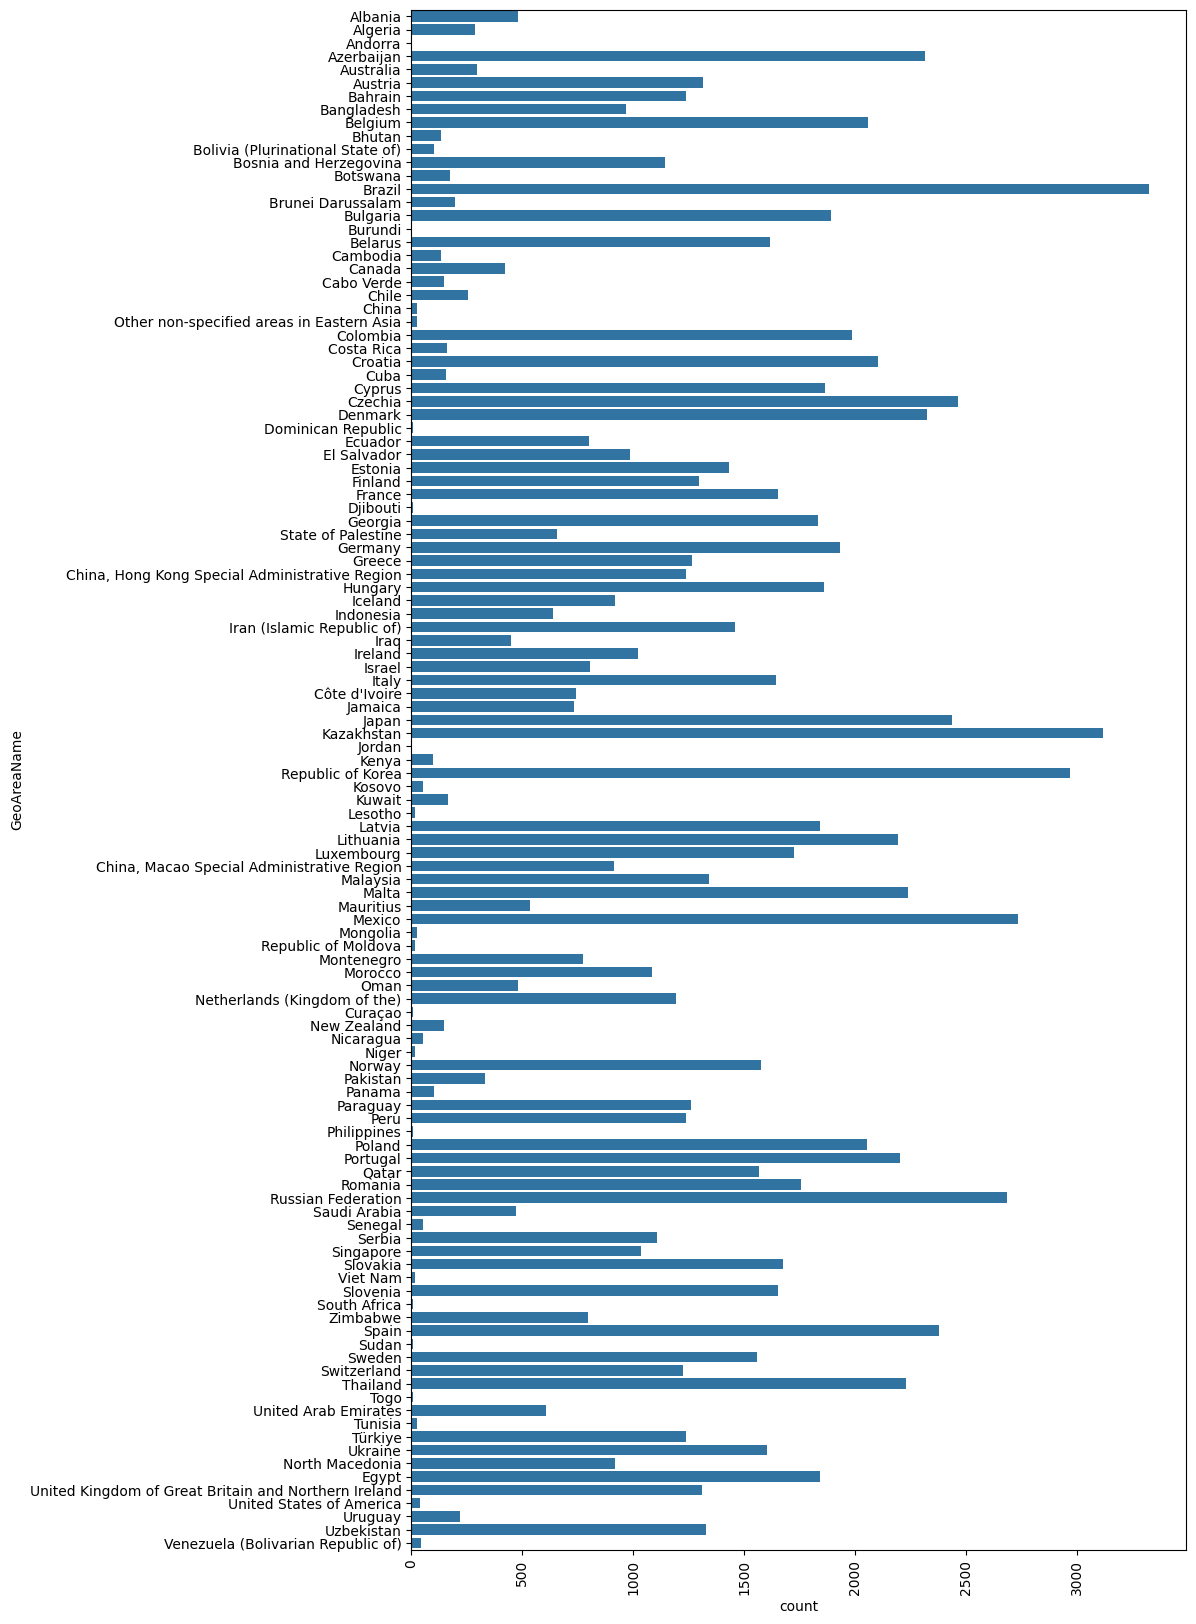

In [23]:
# check the distribution of the column "GeoAreaName"
plt.figure(figsize=(10, 20))
sns.countplot(data_441["GeoAreaName"])
plt.xticks(rotation=90)
plt.show()

In [18]:
# show data of Indonesia
data_441_indonesia = data_441[data_441["GeoAreaName"] == "Indonesia"]

In [25]:
len(data_441)

117301

In [24]:
# print the percentage betweeen the indonesia and the world
print(f"Indonesia: {data_441_indonesia.shape[0] / data_441.shape[0] * 100:.2f}%")

Indonesia: 0.54%


In [19]:
data_441_indonesia

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Source,FootNote,Age,Location,Sex,Type of skill
45475,360,Indonesia,2015,4.0,BADAN PUSAT STATISTIK (STATISTICS OF INDONESIA),NaN,15-24,ALLAREA,MALE,INTBNK
45476,360,Indonesia,2015,22.8,BADAN PUSAT STATISTIK (STATISTICS OF INDONESIA),NaN,75+,ALLAREA,BOTHSEX,INTBNK
45477,360,Indonesia,2015,7.7,BPS-Statistics Indonesia,This data is from SUSENAS 2015. It is approac...,ALLAGE,ALLAREA,BOTHSEX,EPRS
45478,360,Indonesia,2015,86.6,BADAN PUSAT STATISTIK (STATISTICS OF INDONESIA),NaN,15-24,ALLAREA,BOTHSEX,SNTWK
45479,360,Indonesia,2015,82.0,BADAN PUSAT STATISTIK (STATISTICS OF INDONESIA),NaN,ALLAGE,ALLAREA,BOTHSEX,SNTWK
...,...,...,...,...,...,...,...,...,...,...
46109,360,Indonesia,2022,20.1,BPS-Statistics Indonesia,NaN,15-24,ALLAREA,MALE,GSINF
46110,360,Indonesia,2022,24.1,BPS-Statistics Indonesia,NaN,25-74,ALLAREA,BOTHSEX,GSINF
46111,360,Indonesia,2022,24.1,BPS-Statistics Indonesia,NaN,25-74,ALLAREA,FEMALE,GSINF
46112,360,Indonesia,2022,24.2,BPS-Statistics Indonesia,NaN,25-74,ALLAREA,MALE,GSINF


### 4. Multivariate Analysis